In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import pygeos
import rtree

/Users/Safia/.pyenv/versions/3.8.12/envs/school-map-project/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
df = gpd.read_file('../raw_data/Maps/social_data_pr.shp')

In [3]:
df.columns

Index(['E_E', 'E_EM', 'E_EW', 'E_EU1', 'E_E1U6', 'E_E6U15', 'E_E15U18',
       'E_E18U25', 'E_E25U55', 'E_E55U65', 'E_E65U80', 'E_E80U110', 'MH_E',
       'MH_EM', 'MH_EW', 'MH_U1', 'MH_1U6', 'MH_6U15', 'MH_15U18', 'MH_18U25',
       'MH_25U55', 'MH_55U65', 'MH_65U80', 'MH_80U110', 'angebotsmi',
       'aenderung_', 'anteil_lei', 'anteil_soz', 'anteil_sta', 'entwicklun',
       'wohndauer', 'wohnungsum', 'wohnungs_1', 'wohnungsve', 'wohnungs_2',
       'Nummer', 'Name', 'EW', 'ant_arbeit', 'ant_transf', 'Kinderarmu',
       'ant_arbe_1', 'ant_tran_1', 'Kinderar_1', 'BEZ', 'geometry'],
      dtype='object')

### Creating a migration rate variable

In [4]:
df['MH_rate'] = df.MH_E / df.E_E

In [5]:
df['MH_rate'].mean()

0.3498408646096005

In [6]:
df['MH_E'].sum() / df['E_E'].sum()

0.3569203165575865

### Creating a population density column

**Computing polygon areas**

In [7]:
df['area'] = df.geometry.area

**Calculating population density**

In [8]:
df['pop_dens'] = df['E_E'] / df['area']

In [37]:
df.wohndauer

0      62.319997
1      61.167671
2      71.059997
3      52.409999
4      69.899998
         ...    
537    69.899997
538    68.998478
539    76.559977
540    62.900546
541    62.090170
Name: wohndauer, Length: 542, dtype: float64

### Calculating population age rates

In [10]:
bins = ['E_EM', 'E_EW', 'E_EU1', 'E_E1U6', 'E_E6U15', 'E_E15U18',
       'E_E18U25', 'E_E25U55', 'E_E55U65', 'E_E65U80', 'E_E80U110']

for b in bins: 
    df[b] = df[b] / df.E_E

In [11]:
bins = ['MH_EM', 'MH_EW', 'MH_U1', 'MH_1U6', 'MH_6U15', 'MH_15U18', 'MH_18U25',
       'MH_25U55', 'MH_55U65', 'MH_65U80', 'MH_80U110']

for b in bins: 
    df[b] = df[b] / df.MH_E

<AxesSubplot:xlabel='pop_dens', ylabel='Count'>

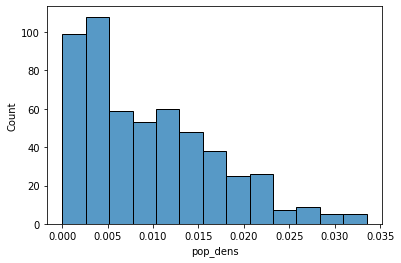

In [13]:
sns.histplot(df['pop_dens'])

In [64]:
df.columns

Index(['E_E', 'E_EM', 'E_EW', 'E_EU1', 'E_E1U6', 'E_E6U15', 'E_E15U18',
       'E_E18U25', 'E_E25U55', 'E_E55U65', 'E_E65U80', 'E_E80U110', 'MH_E',
       'MH_EM', 'MH_EW', 'MH_U1', 'MH_1U6', 'MH_6U15', 'MH_15U18', 'MH_18U25',
       'MH_25U55', 'MH_55U65', 'MH_65U80', 'MH_80U110', 'angebotsmi',
       'aenderung_', 'anteil_lei', 'anteil_soz', 'anteil_sta', 'entwicklun',
       'wohndauer', 'wohnungsum', 'wohnungs_1', 'wohnungsve', 'wohnungs_2',
       'Nummer', 'Name', 'EW', 'ant_arbeit', 'ant_transf', 'Kinderarmu',
       'ant_arbe_1', 'ant_tran_1', 'Kinderar_1', 'BEZ', 'geometry', 'area',
       'pop_dens', 'MH_rate'],
      dtype='object')

In [14]:
columns = ['E_EM', 'E_EW', 'E_EU1', 'E_E1U6', 'E_E6U15', 'E_E15U18',
       'E_E18U25', 'E_E25U55', 'E_E55U65', 'E_E65U80', 'E_E80U110', 'MH_E',
       'MH_EM', 'MH_EW', 'MH_U1', 'MH_1U6', 'MH_6U15', 'MH_15U18', 'MH_18U25',
       'MH_25U55', 'MH_55U65', 'MH_65U80', 'MH_80U110', 'angebotsmi',
       'aenderung_', 'anteil_lei', 'anteil_soz', 'anteil_sta', 'entwicklun',
       'wohndauer', 'wohnungsum', 'wohnungs_1', 'wohnungsve', 'wohnungs_2',
       'ant_arbeit', 'ant_transf', 'Kinderarmu',
       'ant_arbe_1', 'ant_tran_1', 'Kinderar_1','MH_rate','pop_dens']

'for c in columns:\n    plt.subplot()\n    sns.histplot(df[c])'

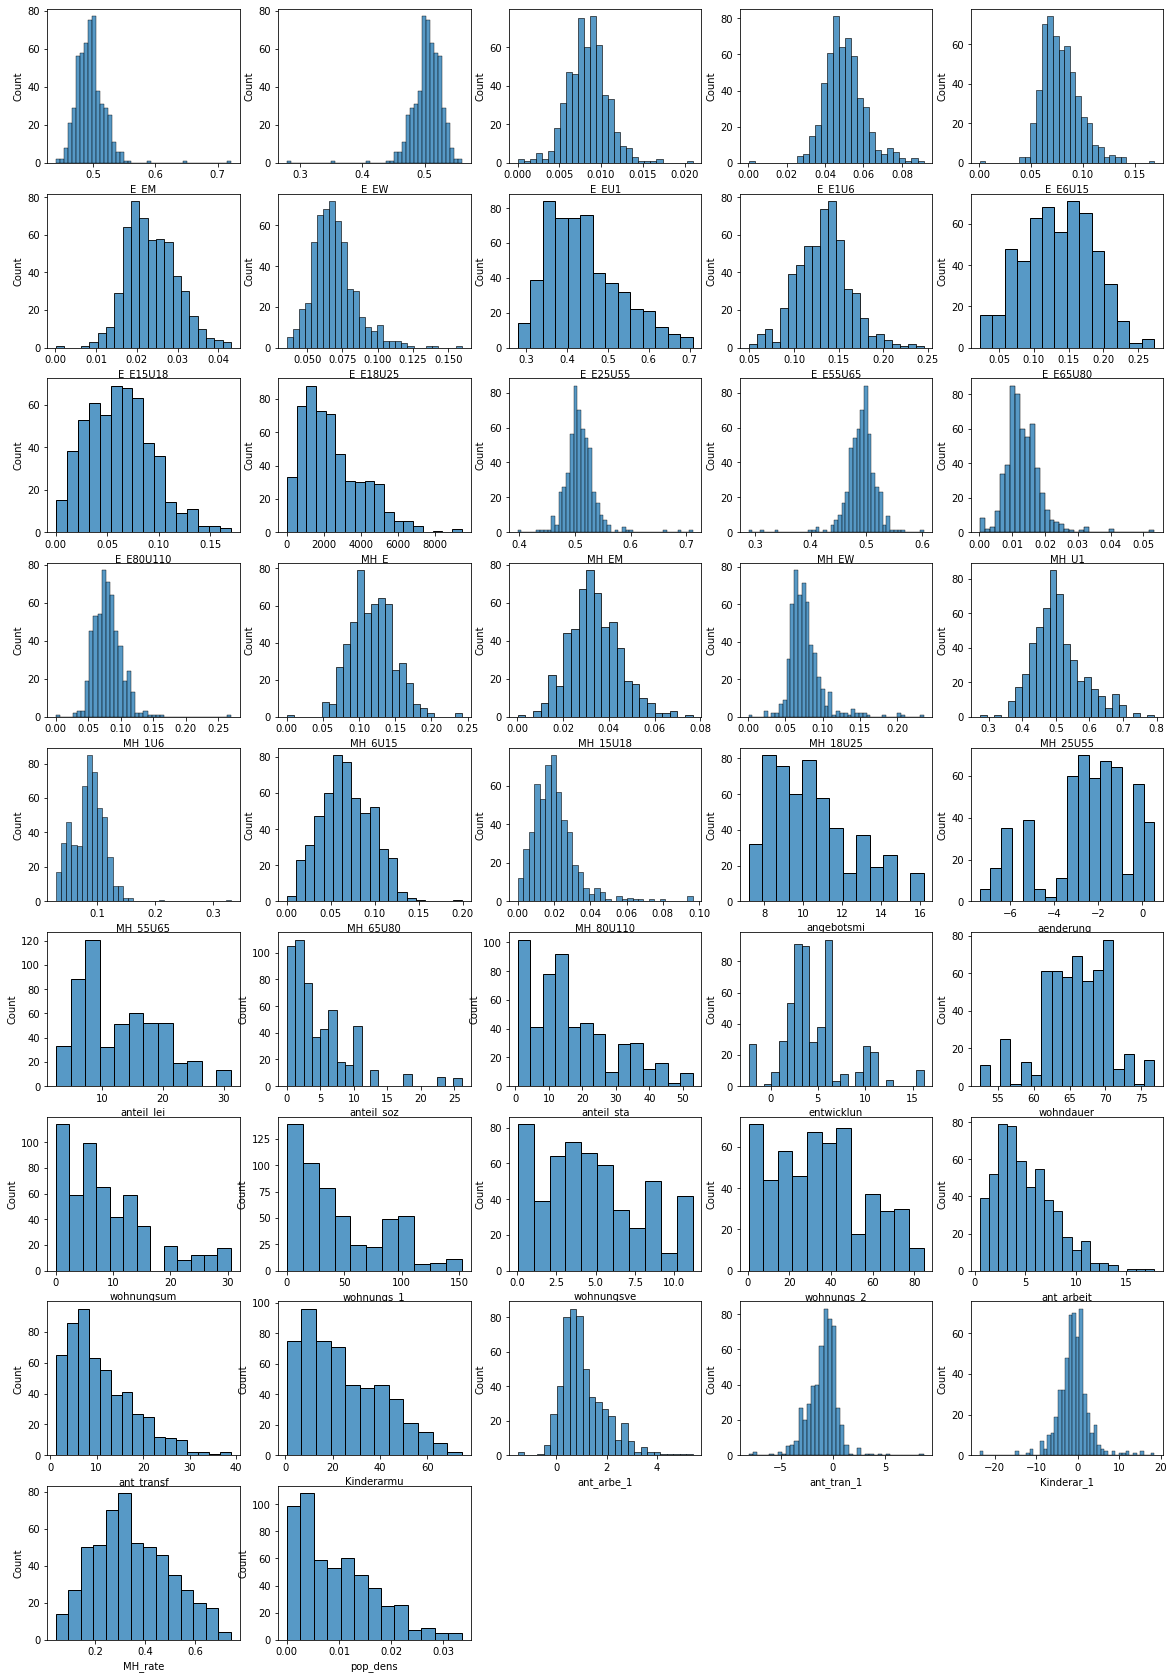

In [36]:
nrows= 9
ncols = 5
count=1

plt.figure(figsize=(20,30))

for c in columns: 
    plt.subplot(nrows, ncols, count)
    sns.histplot(df[c])
    count +=1

plt.show
